<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Роман! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы».


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

По причение невозможности загрузки изображений Jupiter Notebook в пактикуме, делал проект в Google Colab

#Прекод
Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

0.1  Описание данных
Данные доступны по ссылке.

В файле train_dataset.csv находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.

В папке train_images содержатся изображения для тренировки модели.

В файле CrowdAnnotations.tsv — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

Имя файла изображения.
Идентификатор описания.
Доля людей, подтвердивших, что описание соответствует изображению.
Количество человек, подтвердивших, что описание соответствует изображению.
Количество человек, подтвердивших, что описание не соответствует изображению.
В файле ExpertAnnotations.tsv содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

Имя файла изображения.
Идентификатор описания.
3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле test_queries.csv находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.

В папке test_images содержатся изображения для тестирования модели.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуйста разберись с оформлением. Все заголовки должны быть оформлены именно с помощью # (или несклькими ###), тогад будет автоматически созданы разделы и подразделы.</div>

## 1  1. Исследовательский анализ данных
Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

Доля исполнителей, подтвердивших, что текст соответствует картинке.
Количество исполнителей, подтвердивших, что текст соответствует картинке.
Количество исполнителей, подтвердивших, что текст не соответствует картинке.
После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.

### Загрузка библиотек

In [136]:
#!wget https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip

In [137]:
#!unzip dsplus_integrated_project_4.zip

In [138]:
#!pip list
#!pip install torch  1.10.0
#!pip3 install "torchvision==0.14.0"
!pip install -q scikit-learn pandas nltk
!pip install -q torchvision

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupShuffleSplit
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import f1_score

#Модули для векторизации изображений
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import os

#Модули для векторизации текста
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from pymystem3 import Mystem

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Если ты работаешь в Colab, то здесь все основные библиотеки уже установлены, я пробовал запускать код без этих установок - все хорошо отрабатывает.
    
    

    
    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Лично меня очень утомляют простыни логов после установки библиотек. И как правило, их все равно никто не читает. Можно добавить флаг -q , будет гораздо аккуратноее.
    
    !pip install -q swifter
</div>

Проверил у себя, Colab требует библиотеки.

In [139]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
import tensorflow as tf
import tensorflow as keras
import seaborn as sns
#import tensor as tf
np.random.seed(0)

 ### Загружаем обучающие данные

In [140]:
DATA_PATH = '/content/to_upload/'
#Тренировочный датасет
data = pd.read_csv(os.path.join(DATA_PATH,'train_dataset.csv'))
data.head(1)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:

    
  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием этой константы, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).
   


А вот это образец универсального кода для загрузки данных    
    
    DATA_PATH = твой путь    
    
    df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
    ....
    
    
-----------------
    
Пожалуйста исправь хардкод во всем проекте.    
    
</div>

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [142]:
data_images = pd.read_csv(os.path.join(DATA_PATH,'test_images.csv'))
data_images.head(5)

,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
К сожалению я не вижу в проекте какого-либо исследования (знакомства) с нашим датасетом. Есть вывод информации всего по двум табличкам.  
    
Зато сразу после загрузки следующих датафреймов ты уже начинаешь из менять.
    
Советую начинать проект с полноценного знакомства с данными. И нужно это в первую очередь тебе самому. Чем лучше ты поймешь, как устроены данные, какие есть взаимосвязи между табличками (если их несолько), сроднишься с ними, тем оптимальнее будет предобработка (просто будут отсутствовать лишние неоптимальные шаги).
    
Поэтому призываю тебя вначале провести знакомство с данными, свормировать значимые выводы, в том числе определиться с дальнейшей стратегии работы над проектом.
    
И когда все эти шаги выполнены - начать второй этап - предобработу, в котором мы уже жонглирем оценками, соединяем датафреймы, удаляем колонки и т.д.
    
Попробую сформулировать вопросы, ответить на которые будет интересно:
    
  - Количество уникальных изображений в обучающем и тестовом наборах
  - Количество уникальных запросов  
  - Количество оценок в экспертном и краудсорсинговом наборах.
  - Что представляют из себя экспертные оценки, что представляют из себя краудсорсинговые оценки
  - Соответствие изображений и описаний друг другу в обучающем и тестовом наборах (оказывается практически все описания и изображения в файле test_queries соответствуют друг другу.
  - Обрати внимание, что query_id содержит в себе имя изображения, к которому он 100% соответствует (1177994172_10d143cb8d.jpg#0 - это query_id, первая часть - это имя файла, и через решетку порядковый  номер описания для этого файла).   
  - Также было бы интересно познакомиться с изображениями, входящими в датасеты.  
    
    
Выводы о том, с какими данными мы продолжим работу.
 </div>

#### Обработка краудсорсиновых данных

In [143]:
data_crown_annotations = pd.read_csv(os.path.join(DATA_PATH,'CrowdAnnotations.tsv'),sep='\t', header=None, names=['image', 'query_id', 'all', 'positive', 'negative'])
data_crown_annotations.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     47830 non-null  object 
 1   query_id  47830 non-null  object 
 2   all       47830 non-null  float64
 3   positive  47830 non-null  int64  
 4   negative  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [144]:
data_crown_annotations.head(1)

,image,query_id,all,positive,negative
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0


In [145]:
#За результирующий столбец примеи столбец "all". Будем считать его как вероятность правильного описания. Уйдем от задичи классификации


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Я вижу, что ты решил свести проект к задаче классификации.  Такое решение возможно, хотя любое "округление" оценок - это потеря информации. Особенно полезна "дробная" шкала в экспертных оценках. А окруляя их ты перечеркиваешь усилия команды, которая собирала данные, ведь получить экспертные оценки в шкале из четырех значений наверняка было непросто.
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
И совершенно непонятно откуда взялось "вошлебное" число 0.4?
</div>

In [146]:
#Кол-во утвердительных описаний
#d = data_crown_annotations[data_crown_annotations['result'] == 1].shape[0] / data_crown_annotations.shape[0]
#print(f'Количество утверд. коммнтариев: {data_crown_annotations[data_crown_annotations["result"] == 1].shape[0]}')
#print(f'Процент от общего количества комментариев: {d}')

In [147]:
data_crown_annotations.head(2)

,image,query_id,all,positive,negative
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3


#### Обработка данных от экспертов

In [148]:
#оценка экспертов
data_expert = pd.read_csv(os.path.join(DATA_PATH,'ExpertAnnotations.tsv'),sep='\t', header=None, names=['image', 'query_id', '1', '1.1', '1.2'])
data_expert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   1         5822 non-null   int64 
 3   1.1       5822 non-null   int64 
 4   1.2       5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


In [149]:
# Фунция получения итогового результата голосования
def expert_result(a, b, c):  #голоса каждого эксперта
  d = ((a-1)/3+(b-1)/3+(c-1)/3)/3
  return d  #вернем дробное, для задачи регрессии уйдем от решения 1 или 0

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Деление на 4 это ошибка, т.к. при переводе исходной шкалы 1-4 получится шкала 0,25-1 (а мы бы хотели 0-1). Испльзуй линейное преобразование (x-1)/3

</div>


Среднее значение больше 0.6 принимаем как верное описение картинки.

In [150]:
# Добавляем столбец с итоговым решение по описанию 0 или 1
data_expert['result'] = data_expert.apply(lambda x: expert_result(x['1'], x['1.1'], x['1.2']), axis=1)
data_expert.head(2)

,image,query_id,1,1.1,1.2,result
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,0.000000
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,0.111111


In [151]:
# количество утвердительных описаний
#print(f'Количествоутверд. коммнтариев: {data_expert[data_expert["result"] == 1].shape[0]}')
#print(f'Процент от общего количества комментариев: {round(d,2)*100}%')

Объеденим достоверные данные краудсорсинга и экспертов.
Данные экспертов будем считать приоритетными в случае оценки одной и той же картинки.

In [152]:
len(list(data_crown_annotations['image'].unique())) #количество уникальных картинок

1000

In [153]:
unic_image_expert = list(data_expert['image'].unique()) #список уникальных картинок от экспертов
print(len(unic_image_expert))


1000


In [154]:
np. array_equal(data_expert['image'].unique(), data_crown_annotations['image'].unique())

True

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b></b></font>
   
Краудсорсинг и эксперты оценивали один и тот же набор картинок.

</div>

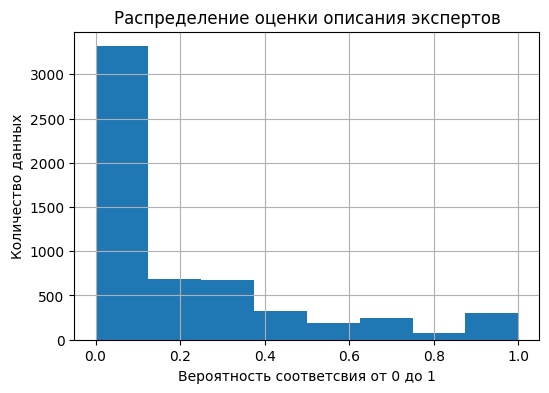

In [155]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()


ax.hist(data_expert["result"], 8)
ax.grid()

plt.title('Распределение оценки описания экспертов')

ax = plt.gca()
ax.set_xlabel("Вероятность соответсвия от 0 до 1")
ax.set_ylabel("Количество данных")

plt.show();

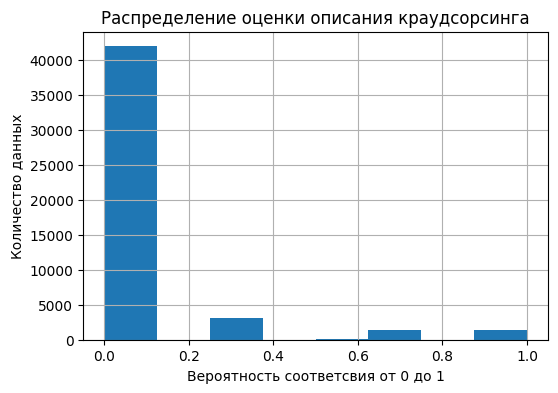

In [156]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()


ax.hist(data_crown_annotations['all'], 8)
ax.grid()
plt.title('Распределение оценки описания краудсорсинга')

ax = plt.gca()
ax.set_xlabel("Вероятность соответсвия от 0 до 1")
ax.set_ylabel("Количество данных")

plt.show();

На одном наборе изображений у обоих групп большее количество оценок отрицательные. Если брать данные общих пересечений большое кол-во данных будет потеряно. Объеденять их тоже не можем из-за большой разницы в кол-ве данных потеряем целевой признак. У краудсорчинга слошком много данных которые могут исказить общую картину с верными описаниями. Будем работать с данными от экспертов. Данные краусорсинга не учитываем.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
С решением (использование только эспертных оценок) согласен, но хотелось бы получить обоснование.
    
Причем здесь обычное обоснование (экспертные оценки более качественные) уже не работает,т.к. ты сводишь задачу к классификации и здесь думаю качество оценки и у экспертов и у краудсорсеров сравнимое.     
</div>


In [157]:
data_expert.head(2)

,image,query_id,1,1.1,1.2,result
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,0.000000
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,0.111111


Добавим текст описания к датасету, очитстим от получившихся пропусков.

In [158]:
data_expert = data_expert.merge(data, left_on=['image','query_id'], right_on=['image', 'query_id'], how='left')

data_expert.head(2)

,image,query_id,1,1.1,1.2,result,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,0.000000,A young child is wearing blue goggles and sitt...
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,0.111111,A girl wearing a yellow shirt and sunglasses s...


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [159]:
data_expert = data_expert.drop(['query_id', '1', '1.1', '1.2'], axis=1)
data_expert.head(2)

,image,result,query_text
0,1056338697_4f7d7ce270.jpg,0.000000,A young child is wearing blue goggles and sitt...
1,1056338697_4f7d7ce270.jpg,0.111111,A girl wearing a yellow shirt and sunglasses s...


## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

### Чистка датасата согласно законам. Удалим все что связано с детьми

In [160]:
#функция определения наличия запрещенных слов в описании картинки
m = Mystem()

def word_in_str(text):
  text = text.lower()
  text = m.lemmatize(text)
  stop_word = ['babe', 'child', 'kid', 'infant', 'brant', 'wean', 'bairn', 'boy', 'girl']
  for i in text:
    if i in stop_word:
      return 1
  return 0

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
На мой взгляд очень странный набор слов... Возможно стоило исследовать текстовые описания и посмотреть какие там слова используются для описания детей?
    
Насколько я понял слова 'brant', 'wean', 'bairn' - это диалектизмы, характерные для Шотландского диалекта, 'babe' тоже не сильно распространненое слово.
    
При этом такие общеупортебимыес лова как boy/girl, которых полно в нашем датасете ты не рассматриваешь.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В исходных текстах слова могут встречаться в разных регистрах, поэтому есть смысл перед сравнением привести все к нижнему регистру
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Чтобы не пропустить слова во множественном числе стоит либо применить лемматизацию к описаниям, либо включить в список stop_word слова как в единственном, так и во множественном числе</div>

In [161]:
#Разметим датасет на разрешенные и запрещенные описания.
#По индексам запрещенных описаний находим относящиеся к ним подтвержденные фото
#Запрещенные описания и фото удаляем
#Не нужные столбцы также удаляем
data_expert['to_dellete'] = data_expert.apply(lambda x: word_in_str(x['query_text']), axis=1)
del_image = data_expert[data_expert['to_dellete']==1]
data_expert = data_expert.loc[data_expert['to_dellete']==0]
data_expert = data_expert.loc[~data_expert['image'].isin(del_image)]        #удаляем фото у которого было хотябы одно подтвержденное описание связанно с запретом
data_expert = data_expert.drop(['to_dellete'], axis=1)
data_expert.shape

(4708, 3)

In [162]:
len(del_image)

1114

In [163]:
#Данные перед векторизацией
data_expert.head(2)

,image,result,query_text
2,1056338697_4f7d7ce270.jpg,0.111111,A man sleeps under a blanket on a city street .
3,1056338697_4f7d7ce270.jpg,0.222222,A woman plays with long red ribbons in an empt...


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удаляешь комментарии, в которых есть слова, обозначающие детей. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    

И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

## 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

Полуение вектора изображений

In [164]:
weights = 'ResNet18_Weights.IMAGENET1K_V1'
resnet = models.resnet18(pretrained=True)
for param in resnet.parameters():
    param.requires_grad_(False)

modules = list(resnet.children())[:-1] #отрезал только один сверточный слой
resnet = nn.Sequential(*modules)

resnet.eval()

norm = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        norm,
    ])

#Функция создания вектора изображения
def image_to_tenzor(img):
    image_tensor = preprocess(img)
    return resnet(image_tensor.unsqueeze(0)).flatten()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Я знаю, что совет "отрезать" два последних слоя был в тренажере. Но, на мой взгляд, там ошибка. Поэтому  я настоятельно рекомендую отрезать только один последний слой, в этом случае размерность вектора признаков будет всего 512 и нашим моделям будет проще работать.
    
форамально я не могу требовать это, оставляю красный цвет комментария для привлечения внимания, из-за высокой важности (и легкости исправления)  

</div>

In [165]:
ROOT_PATH = '/content/to_upload/'
images = data_expert.image.unique()
tenzors_image = []
images_orders = []
query_tenzor = {}    # Создадим словарь {имя_картинки: тензор}

for i, image in enumerate(images):
  if i % 100 == 0:
    print(f'Processed {i} images')
  path = os.path.join(ROOT_PATH, 'train_images', image)
  images_orders.append(image)
  img = Image.open(path)
  tenzor = image_to_tenzor(img)  #получаем вектор изображения
  query_tenzor[image]=tenzor.numpy()
  tenzors_image.append(tenzor)

Processed 0 images
Processed 100 images
Processed 200 images
Processed 300 images
Processed 400 images
Processed 500 images
Processed 600 images
Processed 700 images
Processed 800 images
Processed 900 images


In [166]:
#Функция добавления вектора в датафрейм
def add_tenzor(image_name, tenzor_dict):
  for i in tenzor_dict:
    if image_name==i:
      return tenzor_dict[image_name]

In [167]:
data_expert['image_vector'] = data_expert.apply(lambda x: add_tenzor(x['image'], query_tenzor), axis=1) #Добавляем целевой признак
data_expert.head(1)

,image,result,query_text,image_vector
2,1056338697_4f7d7ce270.jpg,0.111111,A man sleeps under a blanket on a city street .,"[0.69394046, 3.0318356, 2.9169335, 0.9518981, ..."


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Нумпай матрицы (np.array) - это базовый тип данных для хранения векторов и матриц. Он оптимален как по памяти, так и скорости доступа к каждому элементу. И это базовай тип данных для машинного обучения. Не советую лишний раз конвертировать матрицы в датафреймы, т.к. датафреймы это надстройка над матрицами. Они нужны в случае, когда мы хотим работать с данными разных типов. Но за это мы расплачиваемся более долгим доступом, большим  размером. П

Поэтому если проект позволяет - оставайся в матрицах, не переходи на датафреймы.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Но стоит показать рамерность полученной матрицы признаков  
</div>

## 4. Векторизация текстов


Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.

In [168]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Функция форматирования текса перед векторизацией
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_tokens)

# Замена старых описаний на изменненные
data_expert['query_text'] = data_expert['query_text'].apply(preprocess_text)


# Создание вектора текста
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data_expert['query_text'].tolist()).toarray()
data_expert['query_text_vector'] = [vect for vect in vectors]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [169]:
data_expert = data_expert.drop(['query_text'], axis=1) #Удаляем описание, боьше не нужно. Вместо него теперь вектор.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас ты сделал вектора с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.

-----------
    
Что касается выбранного подхода. По моим наблюдения используя TfidfVectorizer крайне редко получается обучить толковую модель.  Я бы советовал все-таки использовать "плотные" вектора полученные с помощью BERT    

</div>

## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

### Подготовка данных для объединения

In [170]:
#Итоговый датасет
data_expert.head(2)

,image,result,image_vector,query_text_vector
2,1056338697_4f7d7ce270.jpg,0.111111,"[0.69394046, 3.0318356, 2.9169335, 0.9518981, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1056338697_4f7d7ce270.jpg,0.222222,"[0.69394046, 3.0318356, 2.9169335, 0.9518981, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [171]:
data_expert['image_vector'] = np.array(data_expert['image_vector'])

### Объединяем массивы.

In [172]:
#Размер будущей матрицы.
shape_needed = data_expert.iloc[:, 2].shape[0], data_expert.iloc[:, 2].values[0].shape[0] + data_expert.iloc[:, 3].values[0].shape[0]

In [173]:
v = np.zeros(shape_needed)
v.shape

(4708, 1733)

In [174]:
col_image = 2 #Номер столбца вектора изображения
col_text = 3  #Номер столбца вектора текста
image_width = data_expert.iloc[:, 2].values[0].shape[0] #Размер вектора изображения

for i in range(data_expert.shape[0]):
  v[i, :image_width] = data_expert.iloc[i, col_image]     #поэлементно добавляю вектор изображения
  v[i, image_width:] = data_expert.iloc[i, col_text]      #дальше поэлементно добавляю к нему вектор текста, т.к. не смог победить вложенные массивы при concatinate и append

In [175]:
data_expert.iloc[:, 3].values[0].shape

(1221,)

In [176]:
#Соединяем вектор изображения и вектор текста.
data_expert.loc[:, 'vector'] = [a for a in np.concatenate([[x for x in data_expert.iloc[:,2].values], [x for x in data_expert.iloc[:,3].values]], axis=1)]

In [177]:
#Создаем отдельно признаки для модели преобразованные в тензор
X = tf.convert_to_tensor(v)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В случае использования keras совсем не обязательно превращать данные в тензоры. В отличие от pytorch он гораздо более дружелюбен и сам преобразует данные к нужному ему типу.
    
    
</div>

In [178]:
#Создаем отдельно массив целевого признака
y = data_expert.result.values

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Вот о чем я говорил... В случае двух нумпай матриц объединение выполняется в одну строчку. А здесь ты вынужден придумыватьсложные предобработки, чтобы соединить вектора
    
    
</div>

Пришлось разделить на отдельные массивы признаки и целевой признак, т.к. не смог победить вложенные массивы после преобразования в тензор.

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

В качетве метрики будем использовать MAE. Т.к. распределение оценок не одинаково.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуйста выбери метрику, которую ты будешь использовать для оценки моделей. И обоснуй свое решение. </div>

In [179]:
#Деление на train и test.
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
# train_indices, test_indices = next(gss.split(X=data_expert.drop(columns=['result']), y=data_expert['result'], groups=data_expert['image']))
train_indices, test_indices = next(gss.split(X=X, y=y, groups=data_expert['image']))
# train_df, test_df = data_expert.iloc[train_indices], data_expert.iloc[test_indices]
X_train, y_train, X_test, y_test = tf.gather(X, train_indices), y[train_indices], tf.gather(X, test_indices), y[test_indices]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

In [180]:

#def join_vector(tensor_image, tensor_text):
  #x = tf.convert_to_tensor(tensor_text, np.float32)

  #y = tensor_image
  #return tf.keras.layers.Concatenate()([y, x])
  #return np.concatenate((tensor_image,tensor_text))
#X_train['image_vector'][0].eval(b)
#tf.convert_to_tensor(data_np, np.float32)

In [181]:
X_test

<tf.Tensor: shape=(1431, 1733), dtype=float64, numpy=
array([[0.58084977, 0.63602173, 1.23535466, ..., 0.        , 0.        ,
        0.        ],
       [0.58084977, 0.63602173, 1.23535466, ..., 0.        , 0.        ,
        0.        ],
       [0.58084977, 0.63602173, 1.23535466, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.37903851, 1.05507958, 0.42936435, ..., 0.        , 0.        ,
        0.        ],
       [0.37903851, 1.05507958, 0.42936435, ..., 0.        , 0.        ,
        0.        ],
       [0.37903851, 1.05507958, 0.42936435, ..., 0.        , 0.        ,
        0.        ]])>

### Линейная регресия

In [182]:
tscv = TimeSeriesSplit(n_splits=5)

Мусор подчистил)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Что это? Пожалуйста почисти проект от лишнего "мусора", оставшегося от предыдущих проектов. </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В этом раздеел есть проблема и заключается она в следующем. Для векторизации изображений ты использовал  на Pytorch.  А для финальной модели  - Keras.  Поддержка двух DL фреймворков - это будет ад для девопса. Поэтому хорошей практикой является использование одного фреймворка в одном проекте.</div>

In [183]:
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(1, input_shape=input_shape, activation='sigmoid'))
    model.compile(optimizer='sgd', loss='mse',
                  metrics=['mae'])

    return model

def train_model(model, features_train, target_train, features_test, target_test, batch_size=32, epochs=5,
               steps_per_epoch=None, validation_steps=None):

    #features_train, target_train = train_data
    #features_test, target_test = test_data
    model.fit(features_train, target_train,
              validation_data=(features_test, target_test),
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Можно считать эту модель логистической регрессией, но кроме архитектуры важен еще и процесс обучения. Напримеря почти уверен, что 5 эпох для нашей модели будет недостаточно и модель просто недообучена. Поэтому лучше взять модель из sklearn</div>

In [184]:
model = create_model(input_shape=(X_train.shape[1], ))
train_model(model, X_train, y_train, X_test, y_test)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 - 1s - 8ms/step - loss: 0.0816 - mae: 0.2143 - val_loss: 0.0708 - val_mae: 0.1984
Epoch 2/5
103/103 - 0s - 2ms/step - loss: 0.0737 - mae: 0.2034 - val_loss: 0.0696 - val_mae: 0.1982
Epoch 3/5
103/103 - 0s - 3ms/step - loss: 0.0713 - mae: 0.2003 - val_loss: 0.0696 - val_mae: 0.2003
Epoch 4/5
103/103 - 0s - 3ms/step - loss: 0.0697 - mae: 0.1984 - val_loss: 0.0690 - val_mae: 0.1968
Epoch 5/5
103/103 - 0s - 3ms/step - loss: 0.0685 - mae: 0.1971 - val_loss: 0.0695 - val_mae: 0.2007


<Sequential name=sequential_2, built=True>

### Полносвязная нейронная сеть

In [185]:
def create_model(lr_adam):
    model = Sequential()
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))  # Для регуляризации
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=lr_adam)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

def train_model(model, features_train, target_train, features_test, target_test, batch_size=32, epochs=5,
               steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(features_train)
    if validation_steps is None:
        validation_steps = len(features_test)

    model.fit(features_train, target_train,
              validation_data=(features_test, target_test),
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model

In [186]:
n_model=create_model(0.001)
train_model(n_model, X_train, y_train, X_test, y_test)

Epoch 1/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3277/3277 - 5s - 2ms/step - loss: 0.1105 - mae: 0.2307 - val_loss: 0.0698 - val_mae: 0.2044
Epoch 2/5
3277/3277 - 3s - 970us/step - loss: 0.0847 - mae: 0.2156 - val_loss: 0.0791 - val_mae: 0.2395
Epoch 3/5
3277/3277 - 5s - 1ms/step - loss: 0.0768 - mae: 0.2092 - val_loss: 0.0809 - val_mae: 0.2438
Epoch 4/5
3277/3277 - 2s - 518us/step - loss: 0.0736 - mae: 0.2067 - val_loss: 0.0664 - val_mae: 0.1988
Epoch 5/5
3277/3277 - 2s - 513us/step - loss: 0.0719 - mae: 0.2033 - val_loss: 0.0672 - val_mae: 0.2055


<Sequential name=sequential_3, built=True>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
На мой взгляд ты воспринимаешь "количество эпох" как гиперпараметр "спущеный с верху". Т.е. устанавливаем параметры сети, запускаем обучение и смотрим на результат.
    
Но в случае с нейронками логика ипользования немного отличается от того, к чему мы привыкли в классических моделях. Здесь лучше работать по другой логике:
    
 - оределилили архитектуру, создали модель
 - начинаем её учить. и учим пока метрика на валидационной выборке улучшается.  Наблюдая в динамике метрики на обучающей и валидационной выборках.
 - если вдруг метрика на обучающей выборке перестала снижаться, можно попробовать уменьшить шаг обучения (например в 10 раз) и продолжить обучение модели.
    
В любом случае полезно обучать модель пока метрика на валидации улучшается. Наша цель - оптимальное состояние модели, при котором модель хорошо находит законмоерности в данных, но еще не переобучилась.
        
После того, как закончили обучение смотрим на логи, анализируем, чего модели не хватило, меняем архитектуру и запускаем обучение по новой.    
    

    

    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).

 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

In [187]:
X_test.shape

TensorShape([1431, 1733])

In [188]:
X_test[0] == X_test[1]

<tf.Tensor: shape=(1733,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>

Нейронная сеть показала лучше результат, чем модель линейной регрессии.

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

In [189]:
#Загружем описания. Выбираем 10 случайных.
df_test = pd.read_csv(os.path.join(DATA_PATH,'test_queries.csv'), sep='|')
df_test.head(2)

,Unnamed: 0,query_id,query_text,image
0,0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg


In [190]:
df_ten_img = df_test[['query_text']].sample(n=10)
df_ten_img = df_ten_img.reset_index()
df_ten_img.head(2)

,index,query_text
0,90,A boy plays basketball .
1,254,There are several people watching a person in ...


In [191]:
#Получаем вектора описаний
vectors = vectorizer.transform(df_ten_img['query_text'].tolist()).toarray()
df_ten_img['text_vector'] = [vect for vect in vectors]
df_ten_img.head(2)

,index,query_text,text_vector
0,90,A boy plays basketball .,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,254,There are several people watching a person in ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Заранее векторизовать описания не стоит. Учитывая, что ты используешь очень быстрый tf-idf векторайзер это лучше делать на лету, внутри функциии, которая будет по описанию искать изображение.
  
</div>

In [192]:
#Загружаем тестовые фото
ROOT_PATH = '/content/to_upload/'
images = df_test.image.unique()
tenzors_image = []
images_orders = []
query_tenzor = {}    # Создадим словарь {имя_картинки: тензор}

for i, image in enumerate(images):
  if i % 10 == 0:
    print(f'Processed {i} images')
  path = os.path.join(ROOT_PATH, 'test_images', image)
  images_orders.append(image)
  img = Image.open(path)
  tenzor = image_to_tenzor(img)  #получаем вектор изображения
  query_tenzor[image]=tenzor.numpy()
  tenzors_image.append(tenzor)

Processed 0 images
Processed 10 images
Processed 20 images
Processed 30 images
Processed 40 images
Processed 50 images
Processed 60 images
Processed 70 images
Processed 80 images
Processed 90 images


In [193]:
#Получаем вектора всех изображений
df_test['image_vector'] = df_test.apply(lambda x: add_tenzor(x['image'], query_tenzor), axis=1) #Добавляем целевой признак
df_test.head(1)

,Unnamed: 0,query_id,query_text,image,image_vector
0,0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg,"[0.44397026, 2.3347216, 0.0063395523, 2.394032..."


In [194]:
#Функция создания признаков к каждому вектору_картинки+вектор_описания
def vector_img_text(text, data_image):                                                                  #функция принимает одно описание и создает пару этого описания с каждым изображением
  shape_needed = data_image.iloc[:, 4].shape[0], data_image.iloc[:, 4].values[0].shape[0] + len(text)   #Размер будущей матрицы.
  ve = np.zeros(shape_needed)
  ve.shape

  col_image = 4 #Номер столбца вектора изображения
  # col_text = 2  #Номер столбца вектора текста
  image_width = data_image.iloc[:, 4].values[0].shape[0] #Размер вектора изображения
  for i in range(data_image.shape[0]):
    ve[i, :image_width] = data_image.iloc[i, col_image] #добавлаем поэлементно вектор изображения
    change_len = image_width
    for j in text:     #поэлементно добавляю вектор изображения
      ve[i][change_len] = j
      change_len+=1
  return ve

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Категорически не советую пытаться применять циклы для работы с матрицами. Это очень неоптимально, долго и потенциальный источник ошибок.
    
Старайся найти, какими встроенными инструментами (функциями из numpy) можно решить эту задачу. Это будет сильно быстрее, потому что в отличие от медленного python написано на быстрых языках программирования (С / Fortran) и оптимально используют все ресурсы компьютера.  
    
На практике разница в выполнении самописного кода на python  и встроенных методов может достигать десятки тысяч раз.
    
Вот примерная логика, как это делается с помощью numpy. Я указал размерность вектора текста 768, как для BERT, но может быть любая.
    
```
   
img_emb = np.random.rand(100, 512)  # Матрица 100x512
text_vect = np.random.rand(768)      # Вектор длины 768    
    
# Повторение вектора text_vect 100 раз по вертикали
text_matrix = np.tile(text_vect, (100, 1))  # Размер: 100x768

    
# Конкатенация матриц по оси 1
result_matrix = np.concatenate((img_emb, text_matrix), axis=1)  # Размер: 100x1280
    
    
    
```    
  
</div>

In [195]:
#Функция получает вектор описания и делает прогноз для всех картинок
#Картинка выбирается по лучшему предсказанию
def text_to_image(model, text_vector, data_image):                  #text_vector - передается одно описание
  vect = vector_img_text(text_vector, data_image)                   #data_image - передается датафрейм со списком векторов ихображений
  vect =tf.convert_to_tensor(vect)

  predition = n_model.predict(vect)                                 #предсказываем

  predition = np.array(predition)
  image = np.array(data_image['image'])

  df = pd.DataFrame({'image_query': image})                         #Создаем общий датафрейм для сортировки
  df['prediction'] = predition
  df = df.sort_values('prediction', ascending=False)                #Сортируем от лучшего к худшему
  df = df.reset_index()
  #print(df)
  return df['image_query'][0]

In [196]:
text_to_image(n_model, df_ten_img['text_vector'][0], df_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


'3488087117_2719647989.jpg'

A boy plays basketball .
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


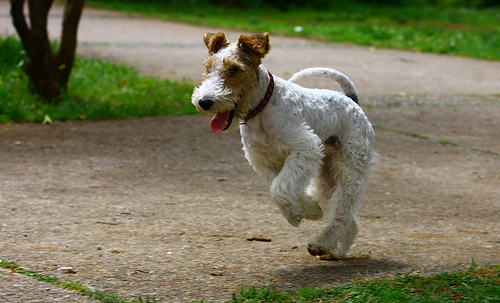

In [197]:
#Цикл for не выводит изображения на каждом этапе итерации, поэтому описания буду передавть вручную
print(df_ten_img['query_text'][0])
name_image = text_to_image(n_model, df_ten_img['text_vector'][0], df_test)
im = Image.open('/content/to_upload/test_images/'+name_image)
im


There are several people watching a person in the air with skies surrounded by mountains and snow .
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


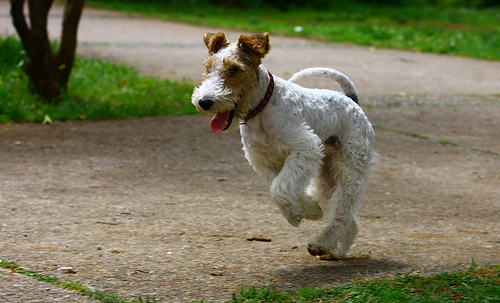

In [198]:
print(df_ten_img['query_text'][1])
name_image = text_to_image(n_model, df_ten_img['text_vector'][1], df_test)
im = Image.open('/content/to_upload/test_images/'+name_image)
im

A brown and white dog walks in the snow with a big chunk of snow in his mouth .
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


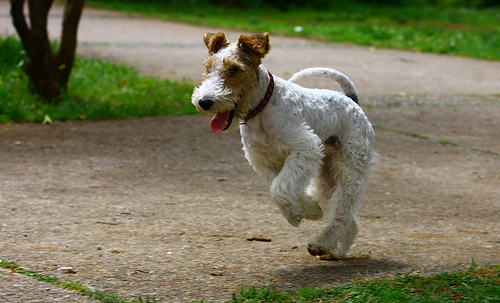

In [199]:
print(df_ten_img['query_text'][2])
name_image = text_to_image(n_model, df_ten_img['text_vector'][2], df_test)
im = Image.open('/content/to_upload/test_images/'+name_image)
im

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Небольшая формальность - пожалуйста добавь в код функции инфереса, чтобы она кроме изображения и текста  выводила найденную меру близости.</div>

Если честно я не совсем понял, что требутся. Нужно добавить в функцию расчет косинусного сходсва? Т.е.:
``` py
import scipy.spatial.distance as ds

vector_1 = 'вектор переданный в модель'
vector_2 =  'вектор собранный из переданного запроса и полученной картинки'

dis = ds.cosine(vector_1, vector_2)
```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

Да, ты прав, к сожалению работают они не очень. Причин несколько
    
 - Думаю что из-за сведения к задаче классификации мы потеряли очень много ценного сигнала.
 - Использован вектор изображения слишком большого размера из за чего модель получается очень сложной (дико много весов)
 - Нейронные сети просто недоучены   
    
----------------
    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок  (и решение задачи регрессиии)  
 - векторизация изображений через pytorch, как есть в теории к спринту  (но с отрезанием только одного слоя)
 - эмбеддинги через bert
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.   
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому.
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения.
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0).
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768).
    
   
</div>

Модель не смогла точно подбирать изображения соответсвующие описаниям

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.

Пожалуйста отработай все красные комментарии.
    
Желтые комментарии на твое усмотрение. Но учитывая что наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>